# Modeling Exercise:
## Corey Solitaire
### 9.15.2020

In [144]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data
from prepare import prep_titanic_data
from prepare import prep_titanic_data_alpha
from prepare import prep_titanic_data_3

# Logistic Regression

### In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

### For all of the models you create, choose a threshold that optimizes for accuracy.

In [2]:
# Cleaned Data for Exploration
df = prep_titanic_data(get_titanic_data())

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,2,1,1
887,1,1,female,19.0,0,0,30.0000,S,2,1,0
888,0,3,female,NaN,1,2,23.4500,S,2,0,0
889,1,1,male,26.0,0,0,30.0000,C,0,1,1


#### Estabolishing a Baseline

In [4]:
df.survived.value_counts() 

0    549
1    342
Name: survived, dtype: int64

In [5]:
baseline_accuracy = (1 - df.survived.mean())
baseline_accuracy

0.6161616161616161

In [6]:
# Just going to delete the missing values for now
df.dropna(inplace=True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [8]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (398, 5) , validate:  (171, 5) , test:  (143, 5)
train:  (398, 1) , validate:  (171, 1) , test:  (143, 1)


In [9]:
X_train

,pclass,age,fare,sibsp,parch
717,2,27.0,10.5000,0,0
471,3,38.0,8.6625,0,0
161,2,40.0,15.7500,0,0
678,3,43.0,46.9000,1,6
543,2,32.0,26.0000,1,0
...,...,...,...,...,...
668,3,43.0,8.0500,0,0
41,2,27.0,21.0000,1,0
806,1,39.0,0.0000,0,0
791,2,16.0,26.0000,0,0


In [10]:
#Baseline for our model
survival_rate = (1- y_train.survived.mean())
survival_rate

0.6256281407035176

### Initial Model: (#1)

In [11]:
## Create a logistic regression object

# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [12]:
# Fit model to traning data
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [13]:
# Print coefficents and intercepts
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.417464   -0.04412522  0.00265357 -0.71225489 -0.14194849]]
Intercept: 
 [8.8196829]


In [14]:
# make a prediction with traning data
y_pred = logit.predict(X_train)

In [15]:
# estimate prob of survival with training data
y_pred_proba = logit.predict_proba(X_train)

In [16]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.37


In [17]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[  0 249]
 [  0 149]]


In [18]:
# Compute percision and support

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       249
           1       0.37      1.00      0.54       149

    accuracy                           0.37       398
   macro avg       0.19      0.50      0.27       398
weighted avg       0.14      0.37      0.20       398



### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [19]:
df1 = prep_titanic_data(get_titanic_data(cached=True))
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [20]:
X = df1[['pclass','age','fare']]
y = df1[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 3) , validate:  (214, 3) , test:  (179, 3)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [21]:
X_train

,pclass,age,fare
689,1,15.0,211.3375
84,2,17.0,10.5000
738,3,NaN,7.8958
441,3,20.0,9.5000
643,3,NaN,56.4958
...,...,...,...
653,3,NaN,7.8292
20,2,35.0,26.0000
589,3,NaN,8.0500
514,3,24.0,7.4958


In [22]:
# Must impute age, will use most frequent value

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [23]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [24]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [25]:
logit1 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, random_state=123, solver='saga')

In [26]:
# Print coefficents and intercepts
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[-0.03542772 -0.00656585  0.01590528]]
Intercept: 
 [0.00180031]


In [27]:
# make a prediction with traning data
y_pred = logit1.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit1.predict_proba(X_train)

In [28]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.67


In [29]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[206  96]
 [ 66 130]]


In [30]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       302
           1       0.58      0.66      0.62       196

    accuracy                           0.67       498
   macro avg       0.67      0.67      0.67       498
weighted avg       0.69      0.67      0.68       498



### 2. Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [31]:
df2 = prep_titanic_data(get_titanic_data())

In [32]:
X = df2[['pclass','age','fare','sex_cat']]
y = df2[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 4) , validate:  (214, 4) , test:  (179, 4)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [33]:
X_train

,pclass,age,fare,sex_cat
689,1,15.0,211.3375,0
84,2,17.0,10.5000,0
738,3,NaN,7.8958,1
441,3,20.0,9.5000,1
643,3,NaN,56.4958,1
...,...,...,...,...
653,3,NaN,7.8292,0
20,2,35.0,26.0000,1
589,3,NaN,8.0500,1
514,3,24.0,7.4958,1


In [34]:
# Must impute age, will use most frequent value

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [35]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [36]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [37]:
logit2 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit2.fit(X_train, y_train)
# Print coefficents and intercepts
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.03453335 -0.00557826  0.01579855 -0.05661408]]
Intercept: 
 [0.00208135]


In [38]:
# make a prediction with traning data
y_pred = logit2.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit2.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.68


In [39]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[208  94]
 [ 66 130]]


In [40]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       302
           1       0.58      0.66      0.62       196

    accuracy                           0.68       498
   macro avg       0.67      0.68      0.67       498
weighted avg       0.69      0.68      0.68       498



### 3. Try out other combinations of features and models.

In [41]:
df3 = prep_titanic_data(get_titanic_data())
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [42]:
X = df3[['pclass','alone','embark_town','sex_cat','age']]
y = df3[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [43]:
X_train

,pclass,alone,embark_town,sex_cat,age
689,1,0,2,0,15.0
84,2,1,2,0,17.0
738,3,1,2,1,NaN
441,3,1,2,1,20.0
643,3,1,2,1,NaN
...,...,...,...,...,...
653,3,1,1,0,NaN
20,2,1,2,1,35.0
589,3,1,2,1,NaN
514,3,1,2,1,24.0


In [44]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [45]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [46]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [47]:
logit3 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit3.fit(X_train, y_train)
# make a prediction with traning data
y_pred = logit3.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit3.predict_proba(X_train)

In [48]:
# Print coefficents and intercepts
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

Coefficient: 
 [[-0.20375364 -0.26556923 -0.02853406 -1.27184454  0.0251824 ]]
Intercept: 
 [0.76256143]


In [49]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [50]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[223  79]
 [ 51 145]]


In [51]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       302
           1       0.65      0.74      0.69       196

    accuracy                           0.74       498
   macro avg       0.73      0.74      0.73       498
weighted avg       0.75      0.74      0.74       498



### Model 4: Imputer Variable Changed

In [52]:
df4 = prep_titanic_data(get_titanic_data())
df4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [53]:
X = df4[['pclass','alone','embark_town','sex_cat','age']]
y = df4[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [54]:
X_train

,pclass,alone,embark_town,sex_cat,age
689,1,0,2,0,15.0
84,2,1,2,0,17.0
738,3,1,2,1,NaN
441,3,1,2,1,20.0
643,3,1,2,1,NaN
...,...,...,...,...,...
653,3,1,1,0,NaN
20,2,1,2,1,35.0
589,3,1,2,1,NaN
514,3,1,2,1,24.0


In [55]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train))

In [56]:
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_validate)
X_validate = pd.DataFrame(imp_mean.transform(X_validate))

In [57]:
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_test)
X_test = pd.DataFrame(imp_mean.transform(X_test))

In [58]:
X_train

,0,1,2,3,4
0,1.0,0.0,2.0,0.0,15.00000
1,2.0,1.0,2.0,0.0,17.00000
2,3.0,1.0,2.0,1.0,29.91794
3,3.0,1.0,2.0,1.0,20.00000
4,3.0,1.0,2.0,1.0,29.91794
...,...,...,...,...,...
493,3.0,1.0,1.0,0.0,29.91794
494,2.0,1.0,2.0,1.0,35.00000
495,3.0,1.0,2.0,1.0,29.91794
496,3.0,1.0,2.0,1.0,24.00000


In [59]:
logit4 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit4.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit4.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit4.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit4.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [60]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       302
           1       0.65      0.74      0.69       196

    accuracy                           0.74       498
   macro avg       0.73      0.74      0.73       498
weighted avg       0.75      0.74      0.74       498



### Test (Model)

In [61]:
df5 = prep_titanic_data(get_titanic_data())

X = df5[['pclass','alone','embark_town','sex_cat','age']]
y = df5[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [62]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [63]:
logit5 = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
logit5.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit5.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit5.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit5.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [64]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       302
           1       0.73      0.71      0.72       196

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.78      0.79      0.78       498



### Test Results for Simple Imputer : baseline = 0.68

- Most_frequent : .68

- Mean : 0.68

- Median: 0.68

Changes made no difference

### Test Results for Change in Variable ('pclass','alone','embark_town','sex_cat','age') baseline =0.74

- add sibsp 0.74

- add parch 0.73

- add fare 0.68

### Test Results for Change in Function Peameters

- C = 1 = 0.76
  - (c=100 : 0.76 ), (c=0.001: 0.41)

- class_weight = 0.74
  - ( removed: 0.76 )

- random_state (Constant)

- Solver
  - ('newton-cg':0.79 ) 
  - ('lbfgs': 0.79)
  - ('liblinear': 0.78) 
  - ('sag': 0.78)
  - ('saga': 0.76)

### Test Results(penalty) baseline = 0.79
Newton
- None :0.79
- l1 : NA
- l2: 0.79
- elasticnet: NA

lbfgs
- none: 0.79
- l1: NA
- l2:0.79
- elasticnet: NA









### 4. Choose you best model and evaluate it on the test dataset. Is it overfit?

- I found that the top models were returned when I used five independent variables along with the newton and lb linear solver.  I pland on using these two solvers for my final model

In [65]:
#Test Model (newton-cg) #6
df6 = prep_titanic_data(get_titanic_data())

X = df6[['pclass','alone','embark_town','sex_cat','age']]
y = df6[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)


train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [66]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = pd.DataFrame(imp_mean.transform(X_validate))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = pd.DataFrame(imp_mean.transform(X_test))

In [67]:
logit6 = LogisticRegression(C=1, random_state = 123, solver='newton-cg')
logit6.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit6.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit6.predict_proba(X_train)

In [68]:
#Test Model (liblinear) #7
df7 = prep_titanic_data(get_titanic_data())

X = df7[['pclass','alone','embark_town','sex_cat','age']]
y = df7[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [69]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = pd.DataFrame(imp_mean.transform(X_validate))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = pd.DataFrame(imp_mean.transform(X_test))

In [70]:
logit7 = LogisticRegression(C=1, random_state = 123, solver='liblinear')
logit7.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit7.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit7.predict_proba(X_train)

#### Evaluate Models #6 and #7 on Validate Sample

In [71]:
y_pred6 = logit6.predict(X_validate)
y_pred7 = logit7.predict(X_validate)

In [72]:
print("model 6\n", logit6.score(X_validate, y_validate))
print("model 7\n", logit7.score(X_validate, y_validate))

model 6
 0.7990654205607477
model 7
 0.7850467289719626


In [73]:
print("model 6\n", confusion_matrix(y_validate, y_pred6))

print("model 7\n", confusion_matrix(y_validate, y_pred7))

model 6
 [[114  19]
 [ 24  57]]
model 7
 [[111  22]
 [ 24  57]]


In [74]:
print("model 6\n", classification_report(y_validate, y_pred6))

print("model 7\n", classification_report(y_validate, y_pred7))

model 6
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       133
           1       0.75      0.70      0.73        81

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214

model 7
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       133
           1       0.72      0.70      0.71        81

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



#### Evaluate our best model on Test

In [75]:
y_pred = logit6.predict(X_test)
y_pred_proba = logit6.predict_proba(X_test)

accuracy = logit6.score(X_test, y_test)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8268156424581006
[[97 17]
 [14 51]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       114
           1       0.75      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



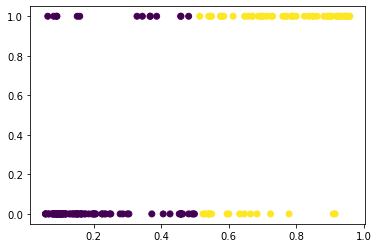

In [76]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])
plt.scatter(y_pred_proba, y_test, c=y_pred)

#### Was your data overfit?

Training Accuracy = 0.79
validate Accuracy = 0.80
Test     Accuracy = 0.83

- Model works well on unseen data, suggest that it is NOT overfit

### 5. Bonus How do different strategies for handling the missing values in the age column affect model performance?

- When i deleted all of the missing values my model accuracy went way down.  When i imputed the values with mean, median, most_frequent, the accuracy of my model was not effected.


### 6. Bonus: How do different strategies for encoding sex affect model performance?

- I only using a binary encoding when using sex in my model.  Without using sex a data input in to my model its accuracy went down, so I know sex is important in how the model works. 

### 7. Bonus: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

### Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

### C=.01,.1,1,10,100,1000

- Low c values kill my models accuracy , high c values do no affect it 

### Bonus Bonus: how does scaling the data interact with your choice of C?

- We are not allowed to scale the data so I do not know

# Model without adding back in Null Values

In [77]:
df8 = prep_titanic_data(get_titanic_data())
df8.dropna(inplace=True)

In [78]:
X = df8[['pclass','alone','embark_town','sex_cat','age']]
y = df8[['survived']]

In [79]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (398, 5) , validate:  (171, 5) , test:  (143, 5)
train:  (398, 1) , validate:  (171, 1) , test:  (143, 1)


In [80]:

# Scaling Data
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
# scaler = MinMaxScaler()
# X_train[['pclass','alone','embark_town','sex_cat','age']] = scaler.fit_transform(X_train[['pclass','alone','embark_town','sex_cat','age']])
# X_validate[['pclass','alone','embark_town','sex_cat','age']] = scaler.fit_transform(X_validate[['pclass','alone','embark_town','sex_cat','age']])
# X_test[['pclass','alone','embark_town','sex_cat','age']] = scaler.transform(X_test[['pclass','alone','embark_town','sex_cat','age']])

In [81]:
#Imputing Missing Data
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(X_train)
# X_train = imp_mean.transform(X_train)

# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(X_validate)
# X_validate = imp_mean.transform(X_validate)

# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(X_test)
# X_test = imp_mean.transform(X_test)

In [82]:
logit8 = LogisticRegression(C=1, random_state = 123, solver='newton-cg')
logit8.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit8.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit8.predict_proba(X_train)

In [83]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit8.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.82


In [84]:
y_pred_proba.round()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [85]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

# Modeling Activity

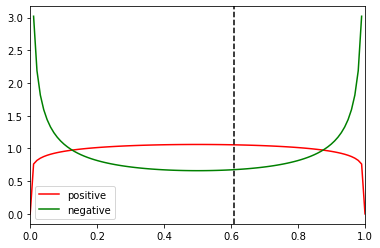

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

test_y = y_pred
predicted_y_probs = y_pred_proba

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.61, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

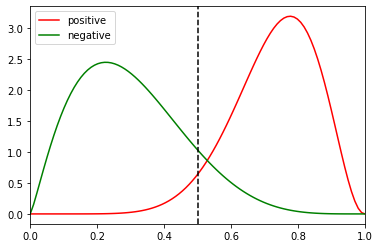

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

test_y = np.array([0]*100 + [1]*100)
predicted_y_probs = np.concatenate((np.random.beta(2,5,100), np.random.beta(8,3,100)))

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.5, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

In [88]:
test_y = np.array([0]*100 + [1]*100)
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# 2nd attempt

In [89]:
# acquire (ok, kinda cheating there)
tips = sns.load_dataset('tips')
tips = tips.drop_duplicates()
tips_dummies = pd.get_dummies(tips[['sex', 'day', 'time', 'smoker']], drop_first=True)
tips = pd.concat([tips, tips_dummies], axis=1)
# create target variable: low_tip, defined as tip < 15% of total bill. 
# create target variable: low_tip, defined as tip < 15% of total bill. 
tips['low_tip_target'] = tips.tip/tips.total_bill < .15
cols_to_drop = ['tip', 'sex', 'smoker', 'day', 'time']
tips.drop(columns=cols_to_drop, inplace = True)
train_validate, test = train_test_split(tips, test_size=.2, random_state=123, 
                                        stratify=tips.low_tip_target)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, 
                                   stratify=train_validate.low_tip_target)
logit = LogisticRegression()

X_train = train.drop(columns=['low_tip_target'])
y_train = train.low_tip_target

X_validate = validate.drop(columns=['low_tip_target'])
y_validate = validate.low_tip_target

X_test = test.drop(columns=['low_tip_target'])
y_test = test.low_tip_target

logit = logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred))
# accuracy
logit.score(X_train, y_train)


[[59 16]
 [29 31]]


0.6666666666666666

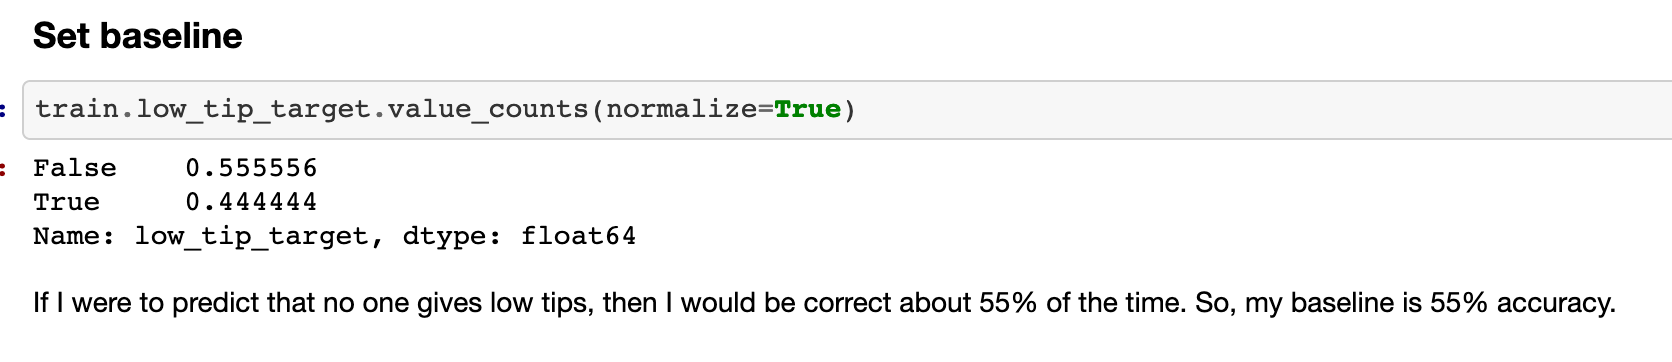

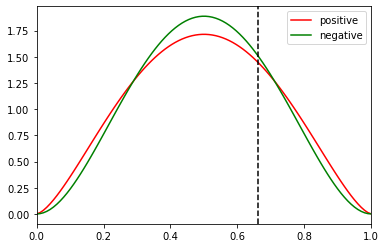

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

test_y = y_pred
predicted_y_probs = y_pred_proba

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.66, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

# Decision Tree Modeling Lesson

In [91]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic_data_alpha
from prepare import prep_titanic_data_beta

In [92]:
#Data that is not scaled, with null values dropped
train, validate, test = prep_titanic_data_alpha(get_titanic_data())

In [93]:
#Baseline Accuracy
baseline_accuracy = (1 - train.survived.mean())
baseline_accuracy

0.5954773869346734

#### Positive Condition = Not Survive

#### Baseline Prediction is Not Survive with 60% Accuracy

In [94]:
train.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sex_cat
450,0,2,36.0,1,2,27.75,2,0,0,1,0,0,1,1
543,1,2,32.0,1,0,26.00,2,0,0,1,0,0,1,1
157,0,3,30.0,0,0,8.05,2,1,0,1,0,0,1,1
462,0,1,47.0,0,0,38.50,2,1,0,1,0,0,1,1
397,0,2,46.0,0,0,26.00,2,1,0,1,0,0,1,1


## 1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

## 2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [95]:
#Model 1 (Tests all variables)
X_train1 = train.drop(columns=['survived'])
y_train = train.survived
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train1, y_train)
y_pred = clf.predict(X_train1)
y_pred_proba = clf.predict_proba(X_train1)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train1, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.84
[[230   7]
 [ 56 105]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.65      0.77       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.86      0.84      0.83       398



In [96]:
#Model 2 (pclass, age, alone, embark_town, sex_cat)
X_train2 = train[['pclass', 'age', 'alone', 'embark_town', 'sex_cat']]
y_train = train.survived
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train2, y_train)
y_pred = clf.predict(X_train2)
y_pred_proba = clf.predict_proba(X_train2)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train2, y_train)))
confusion_matrix(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.84
[[230   7]
 [ 58 103]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.64      0.76       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.85      0.84      0.83       398



In [97]:
#Model 3
X_train3 = train[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_train = train.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train3, y_train)
y_pred = clf.predict(X_train3)
y_pred_proba = clf.predict_proba(X_train3)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train3, y_train)))

confusion_matrix(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.84
[[230   7]
 [ 56 105]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.65      0.77       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.86      0.84      0.83       398



In [98]:
#Imputed Age (Mean)
#Model #4
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_train4 = train[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_train = train.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train4, y_train)
y_pred = clf.predict(X_train4)
y_pred_proba = clf.predict_proba(X_train4)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train4, y_train)))

confusion_matrix(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.83
[[277  30]
 [ 57 134]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



### Model # 3 and Model # 4 provide the greatest accuracy so I will now use them to validate

In [99]:
#Model 3
train, validate, test = prep_titanic_data_alpha(get_titanic_data())
X_validate3 = validate[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_validate = validate.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_validate3, y_validate)
y_pred = clf.predict(X_validate3)
y_pred_proba = clf.predict_proba(X_validate3)

print('Accuracy of Decision Tree classifier on validate data set: {:.2f}'
     .format(clf.score(X_validate3, y_validate)))

Accuracy of Decision Tree classifier on validate data set: 0.83


In [100]:
#Model #4
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_validate4 = validate[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_validate = validate.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_validate4, y_validate)
y_pred = clf.predict(X_validate4)
y_pred_proba = clf.predict_proba(X_validate4)

print('Accuracy of Decision Tree classifier on validate data set: {:.2f}'
     .format(clf.score(X_validate4, y_validate)))

Accuracy of Decision Tree classifier on validate data set: 0.83


### Model # 4 provide the greatest accuracy in validate so I will now apply it to Test

In [101]:
#Model #4
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_test4 = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_test = test.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_test4, y_test)
y_pred = clf.predict(X_test4)
y_pred_proba = clf.predict_proba(X_test4)

print('Accuracy of Decision Tree classifier on test data set: {:.2f}'
     .format(clf.score(X_test4, y_test)))

Accuracy of Decision Tree classifier on test data set: 0.85


## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [102]:
#Best Model
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_test4 = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_test = test.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_test4, y_test)
y_pred = clf.predict(X_test4)
y_pred_proba = clf.predict_proba(X_test4)

print('Accuracy of Decision Tree classifier on test data set: {:.2f}'
     .format(clf.score(X_test4, y_test)))

Accuracy of Decision Tree classifier on test data set: 0.85


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       110
           1       0.86      0.74      0.80        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [104]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[102   8]
 [ 18  51]]


#### Classification Accuracy: Overall, how often is the classifier correct?

In [105]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.8547486033519553
0.8547486033519553


#### Classification Error: Overall, how often is the classifier incorrect?

In [106]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, y_pred))

0.1452513966480447
0.14525139664804465


#### Sensitivity: When the actual value is positive, how often is the prediction correct?

In [107]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, y_pred))

0.7391304347826086
0.7391304347826086


#### Specificity: When the actual value is negative, how often is the prediction correct?

In [108]:
specificity = TN / (TN + FP)
print(specificity)

0.9272727272727272


#### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [109]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.07272727272727272
0.07272727272727275


#### Precision: When a positive value is predicted, how often is the prediction correct?

In [110]:
precision = TP / float(TP + FP)
print(precision)
print(precision_score(y_test, y_pred))

0.864406779661017
0.864406779661017


# 4. Run through steps 2-4 using a different max_depth value.

#### I chose 8 features for my model so I will increase max_depth value to 8

In [111]:
#Train
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_train4 = train[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_train = train.survived

clf = DecisionTreeClassifier(max_depth=8, random_state=123)
clf.fit(X_train4, y_train)
y_pred = clf.predict(X_train4)
y_pred_proba = clf.predict_proba(X_train4)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train4, y_train)))
confusion_matrix(y_train, y_pred)

Accuracy of Decision Tree classifier on training set: 0.90


array([[298,   9],
       [ 39, 152]])

In [112]:
#Validate
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_validate4 = validate[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_validate = validate.survived

clf = DecisionTreeClassifier(max_depth=8, random_state=123)
clf.fit(X_validate4, y_validate)
y_pred = clf.predict(X_validate4)
y_pred_proba = clf.predict_proba(X_validate4)

print('Accuracy of Decision Tree classifier on validate data set: {:.2f}'
     .format(clf.score(X_validate4, y_validate)))
confusion_matrix(y_validate, y_pred)

Accuracy of Decision Tree classifier on validate data set: 0.96


array([[130,   2],
       [  6,  76]])

In [113]:
#Test
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X_test4 = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_test = test.survived

clf = DecisionTreeClassifier(max_depth=8, random_state=123)
clf.fit(X_test4, y_test)
y_pred = clf.predict(X_test4)
y_pred_proba = clf.predict_proba(X_test4)

print('Accuracy of Decision Tree classifier on test data set: {:.2f}'
     .format(clf.score(X_test4, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on test data set: 0.96
[[108   2]
 [  5  64]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.97      0.93      0.95        69

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.96       179
weighted avg       0.96      0.96      0.96       179



#### Not Survived/Not Survived
tp Rate = 108/179 = 0.603
#### Not Survived/Survived
fp Rate = 2/179 = 0.011
#### Survived / Not Survived
fn Rate = 5/179 = 0.028
#### Survived / Survived
tn Rate = 64/179 = 0.358

In [114]:
print(X_test4.shape)

(179, 8)


# 5. Which performs better on your in-sample data?

#### The model with max_depth = # of features worked better on my sample data.  I went from a 85% accuracy with max_dept = 3 to a 96% accuracy with max_depth = 8

In [115]:
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y = test.survived


# 6. Visualize Model:

In [116]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [117]:
# Prepare the data data
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y = test.survived

In [118]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_depth = 8, random_state=1234)
model = clf.fit(X, y)

In [119]:
# To view text representation
#print(text_representation)

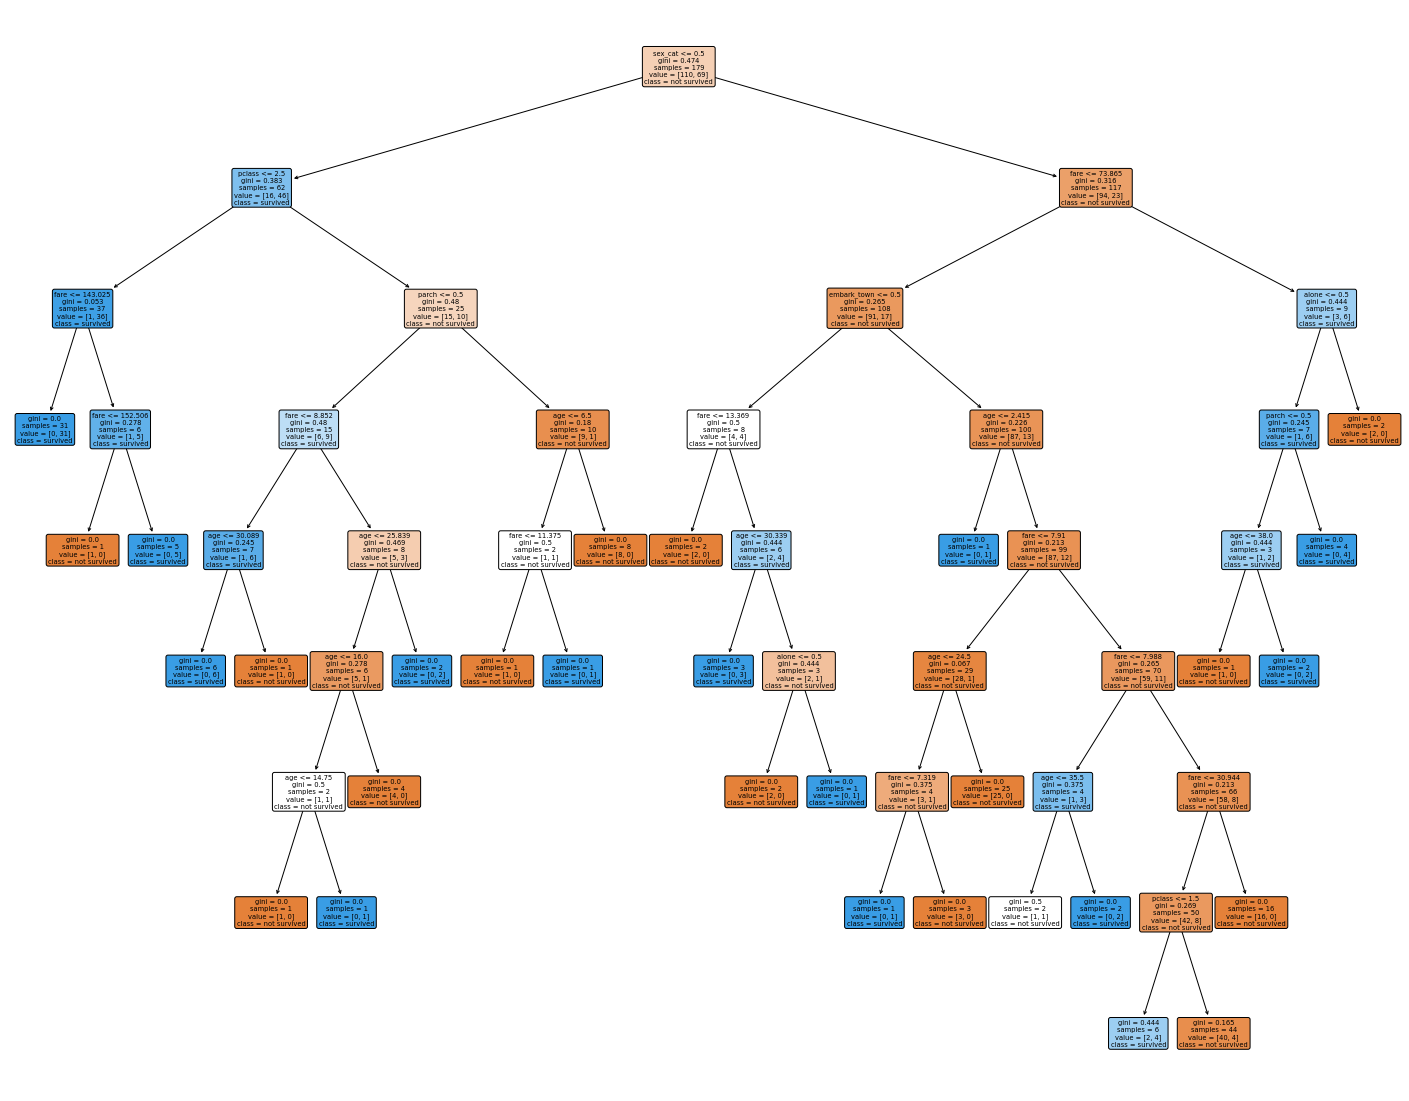

In [120]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names= X.columns,  
                   class_names= {0:'not survived', 1:'survived'},
                   rounded=True,
                   filled=True)

#fig.savefig("decistion_tree.pdf")

In [121]:
# Better Visualization, Easier to See
train, validate, test = prep_titanic_data_beta(get_titanic_data())
X = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y = test.survived

clf = DecisionTreeClassifier(max_depth = 8, random_state=1234)
model = clf.fit(X, y)

import graphviz
from graphviz import Graph

dot_data = export_graphviz(model,
                           feature_names= X.columns,  
                           class_names= {0:'not survived', 1:'survived'},
                           rounded=True,
                           filled=True,
                           out_file=None) 

#graph = graphviz.Source(dot_data) 

#graph.render('titanic_decision_tree_2', view=True)

In [122]:
# Very cool visualiztion that breaks data down in to cool charts
from dtreeviz.trees import dtreeviz # remember to load the package

train, validate, test = prep_titanic_data_beta(get_titanic_data())
X = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y = test.survived

clf = DecisionTreeClassifier(max_depth = 8, random_state=1234)
model = clf.fit(X, y)


viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=X.columns,
                class_names={0:'not survived', 1:'survived'})


In [123]:
#viz
#viz.save("viz_decision_tree.svg")

In [124]:
## Scaled Dataset is data_3
#train, validate, test = prep_titanic_data_3(get_titanic_data())

## Unscaled Dataset is data_beta
#train, validate, test = prep_titanic_data_beta(get_titanic_data())

# Random Forrest Modeling Lesson


## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.

In [125]:
train, validate, test = prep_titanic_data_beta(get_titanic_data())
#Model 1
X_train = train[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_train = train.survived

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

rf.fit(X_train, y_train)

# Estimate whether or not a passenger would survive, using the training data
y_pred = rf.predict(X_train)

# Estimate the probability of a passenger surviving, using the training data
y_pred_proba = rf.predict_proba(X_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [126]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on validate set: 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       1.00      0.99      0.99       191

    accuracy                           1.00       498
   macro avg       1.00      0.99      1.00       498
weighted avg       1.00      1.00      1.00       498



In [127]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_train, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[307   0]
 [  2 189]]


## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [128]:
# Classification Accuracy: Overall, how often is the classifier correct?

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_train, y_pred))

0.9959839357429718
0.9959839357429718


In [129]:
# Classification Error: Overall, how often is the classifier incorrect?

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_train, y_pred))

0.004016064257028112
0.004016064257028162


In [130]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_train, y_pred))

0.9895287958115183
0.9895287958115183


In [131]:
# Specificity: When the actual value is negative, how often is the prediction correct?

specificity = TN / (TN + FP)
print(specificity)

1.0


In [132]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.0
0.0


In [133]:
# Precision: When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
print(precision)
print(precision_score(y_train, y_pred))

1.0
1.0


In [134]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       1.00      0.99      0.99       191

    accuracy                           1.00       498
   macro avg       1.00      0.99      1.00       498
weighted avg       1.00      1.00      1.00       498



## 4. Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

In [135]:
X_train2 = train[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_train2 = train.survived

rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

rf2.fit(X_train2, y_train2)

# Estimate whether or not a passenger would survive, using the training data
y_pred_2 = rf2.predict(X_train2)

# Estimate the probability of a passenger surviving, using the training data
y_pred_proba = rf2.predict_proba(X_train2)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train2, y_train2)))
print(classification_report(y_train, y_pred_2))

Accuracy of random forest classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       307
           1       0.85      0.67      0.75       191

    accuracy                           0.83       498
   macro avg       0.84      0.80      0.81       498
weighted avg       0.83      0.83      0.82       498



### Evaluating the two models on Validate

In [136]:
X_validate_1 = validate[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
X_validate_2 = validate[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_validate = validate.survived

test1 = rf.score(X_validate_1, y_validate)
test2 = rf2.score(X_validate_2, y_validate)

y_pred_1 = rf.predict(X_validate_1)
y_pred_2 = rf2.predict(X_validate_2)

In [139]:
print('Accuracy of random forest classifier 1 on validate set: {:.2f}'
     .format(rf.score(X_validate_1, y_validate)))

print(classification_report(y_validate, y_pred_1))

print(confusion_matrix(y_validate, y_pred_1))

Accuracy of random forest classifier 1 on validate set: 0.80
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       132
           1       0.79      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214

[[117  15]
 [ 27  55]]


In [140]:
print('Accuracy of random forest classifier 1 on validate set: {:.2f}'
     .format(rf2.score(X_validate_2, y_validate)))

print(classification_report(y_validate, y_pred_2))

print(confusion_matrix(y_validate, y_pred_2))

Accuracy of random forest classifier 1 on validate set: 0.79
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       132
           1       0.78      0.61      0.68        82

    accuracy                           0.79       214
   macro avg       0.78      0.75      0.76       214
weighted avg       0.78      0.79      0.78       214

[[118  14]
 [ 32  50]]


### Evaluating the two models on Test

In [141]:
X_test_1 = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
X_test_2 = test[['pclass', 'age', 'alone', 'embark_town', 'sex_cat','sibsp','parch','fare']]
y_test = test.survived

test1 = rf.score(X_test_1, y_test)
test2 = rf2.score(X_test_2, y_test)

y_pred_1 = rf.predict(X_test_1)
y_pred_2 = rf2.predict(X_test_2)

In [142]:
print('Accuracy of random forest classifier 1 on test set: {:.2f}'
     .format(rf.score(X_test_1, y_test)))

print(classification_report(y_test, y_pred_1))

print(confusion_matrix(y_test, y_pred_1))

Accuracy of random forest classifier 1 on test set: 0.73
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       110
           1       0.65      0.62      0.64        69

    accuracy                           0.73       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.73      0.73       179

[[87 23]
 [26 43]]


In [143]:
print('Accuracy of random forest classifier 1 on test set: {:.2f}'
     .format(rf2.score(X_test_2, y_test)))

print(classification_report(y_test, y_pred_2))

print(confusion_matrix(y_test, y_pred_2))

Accuracy of random forest classifier 1 on test set: 0.79
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[97 13]
 [24 45]]


## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The second model (increasting min sample leaf to 5 and decreaseing max depth to 3) initally did not fit as well as the first.  However it did drop accuracy in test (5 %) suggesting it was still over fit.  Luckily it did not drop accuracy by 20% like model one.

# KNN Model

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

## 4. Run through steps 2-4 setting k to 10

## 5. Run through setps 2-4 setting k to 20

## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?